### Importación de datos



In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [52]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, t in enumerate(tiendas, start=1):
    total = t['Precio'].sum()
    print(f'La facturacion total de la tienda {i} es: ${total}')

La facturacion total de la tienda 1 es: $1150880400.0
La facturacion total de la tienda 2 es: $1116343500.0
La facturacion total de la tienda 3 es: $1098019600.0
La facturacion total de la tienda 4 es: $1038375700.0


Esto nos muestra facturaciones totales sin tener en cuenta los años, hare un analisis para saber desde que año hay ventas.

Se revisan que años se registran en las 4 tiendas

In [55]:
for i, t in enumerate(tiendas, start=1):
    # Convertir a datetime
    t['Fecha de Compra'] = pd.to_datetime(t['Fecha de Compra'], errors='coerce')

    # Filtrar filas válidas
    fechas_validas = t['Fecha de Compra'].dropna()

    # Extraer años únicos si hay fechas válidas
    if not fechas_validas.empty:
        años_disponibles = fechas_validas.dt.year.unique()
        años_disponibles.sort()
        print(f"Años disponibles en Tienda {i}: {años_disponibles}")
    else:
        print(f"Tienda {i}: No hay fechas válidas.")

Años disponibles en Tienda 1: [2020 2021 2022 2023]
Años disponibles en Tienda 2: [2020 2021 2022 2023]
Años disponibles en Tienda 3: [2020 2021 2022 2023]
Años disponibles en Tienda 4: [2020 2021 2022 2023]


/tmp/ipython-input-55-3586801710.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t['Fecha de Compra'] = pd.to_datetime(t['Fecha de Compra'], errors='coerce')


Se confirma que el registro de ventas se ha hecho en los años (2020, 2021, 2022, 2023)

Revisamos las ventas totales por año

In [64]:
tiendas = [tienda, tienda2, tienda3, tienda4]

# Limpieza y preparación de datos
for i in range(len(tiendas)):
    tiendas[i]['Fecha de Compra'] = pd.to_datetime(tiendas[i]['Fecha de Compra'], errors='coerce')  # convierte y pone NaT si falla
    tiendas[i] = tiendas[i].dropna(subset=['Fecha de Compra'])  # elimina filas sin fecha válida
    tiendas[i]['Año'] = tiendas[i]['Fecha de Compra'].dt.year.astype(int)  # extrae año como entero

for i, t in enumerate(tiendas, start=1):
    facturacion_anual = t.groupby('Año')['Precio'].sum()

    print(f'\nFacturación por año - Tienda {i}:')
    for año, total in facturacion_anual.items():
        print(f'  Año {año}: ${total:,.2f}')


Facturación por año - Tienda 1:
  Año 2020: $368,933,200.00
  Año 2021: $362,120,800.00
  Año 2022: $316,565,600.00
  Año 2023: $103,260,800.00

Facturación por año - Tienda 2:
  Año 2020: $131,441,000.00
  Año 2021: $115,219,300.00
  Año 2022: $143,767,200.00
  Año 2023: $39,622,200.00

Facturación por año - Tienda 3:
  Año 2020: $321,707,500.00
  Año 2021: $362,954,400.00
  Año 2022: $350,438,300.00
  Año 2023: $62,919,400.00

Facturación por año - Tienda 4:
  Año 2020: $112,464,600.00
  Año 2021: $120,668,900.00
  Año 2022: $110,838,000.00
  Año 2023: $24,743,600.00


/tmp/ipython-input-64-2256317114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiendas[i]['Año'] = tiendas[i]['Fecha de Compra'].dt.year.astype(int)  # extrae año como entero
/tmp/ipython-input-64-2256317114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiendas[i]['Año'] = tiendas[i]['Fecha de Compra'].dt.year.astype(int)  # extrae año como entero


# 2. Ventas por categoría

In [21]:
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, t in enumerate(tiendas, start=1):
    print(f"\nCategorias en tienda {i} con cantidades:")
    print(t['Categoría del Producto'].value_counts())


Categorias en tienda 1 con cantidades:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorias en tienda 2 con cantidades:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorias en tienda 3 con cantidades:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dt

Se confirma que por cada tienda existen 8 categorias unicas

# 3. Calificación promedio de la tienda


In [6]:
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, p in enumerate(tiendas, start=1):
  promedio = p['Calificación'].mean()
  print(f'La calificacion promedio de la tienda {i} es: {promedio}')

La calificacion promedio de la tienda 1 es: 3.976685036032217
La calificacion promedio de la tienda 2 es: 4.037303942348453
La calificacion promedio de la tienda 3 es: 4.048325561678677
La calificacion promedio de la tienda 4 es: 3.9957591178965224


La calificacion de cada tienda esta por el promedio de 3 a 4 puntuaciones de las calificaciones.

# 4. Productos más y menos vendidos

In [10]:
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, t in enumerate(tiendas, start=1):
    print(f"\nProductos en tienda {i} vendidos:")
    print(t['Producto'].value_counts())


Productos en tienda 1 vendidos:
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Cama k

# 5. Envío promedio por tienda

In [15]:
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, c in enumerate(tiendas, start=1):
  costo = c['Costo de envío'].mean()
  print(f'el valor de envio promedio de la tienda {i} es: {costo:.1f}')

el valor de envio promedio de la tienda 1 es: 26018.6
el valor de envio promedio de la tienda 2 es: 25216.2
el valor de envio promedio de la tienda 3 es: 24805.7
el valor de envio promedio de la tienda 4 es: 23459.5


# Generacion de graficos


Para el analisis respectivo se utilizaran los datos de:

- ventas por categorias por tienda
- Ingresos por tienda
- Calificacion promedio por tienda

Grafico 1. ventas por categoria por tienda, se muestran en orden alfabetico por categoria

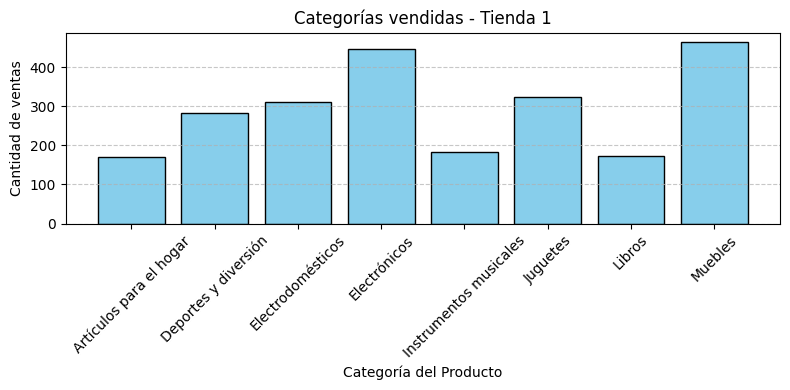

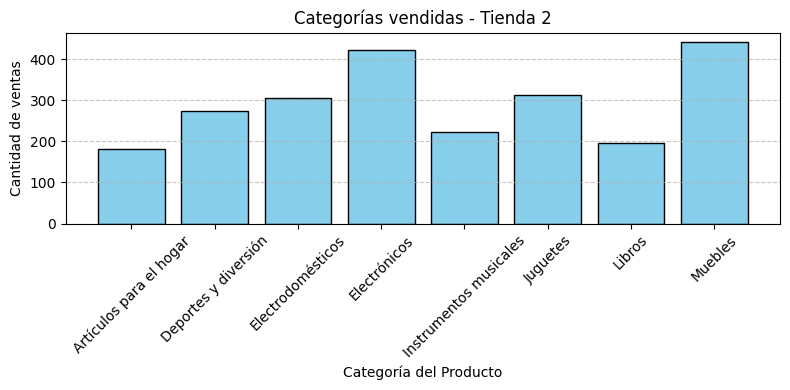

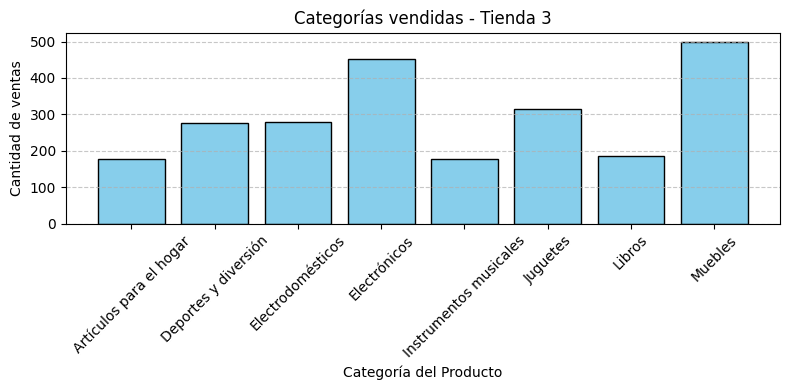

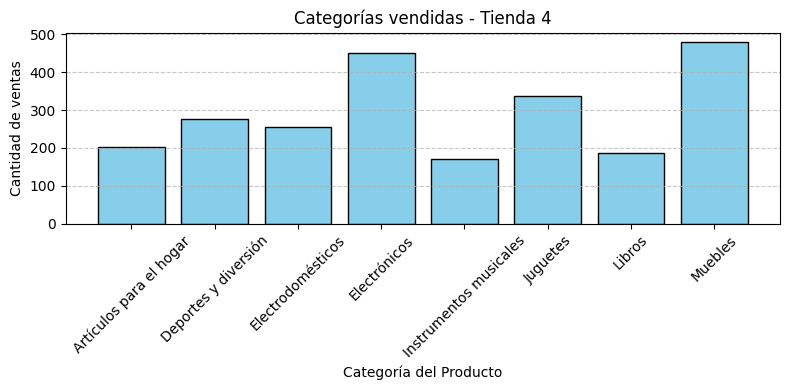

In [28]:
tiendas = [tienda, tienda2, tienda3, tienda4]
for i, t in enumerate(tiendas, start=1):
    #print(f"\nCategorias en tienda {i} con cantidades:")
    conteo_categoria= t['Categoría del Producto'].value_counts().sort_index()
    #print(conteo_categoria)

# se agrega el grafico
    plt.figure(figsize=(8, 4))
    plt.bar(conteo_categoria.index, conteo_categoria.values, color='skyblue', edgecolor='black')

    plt.title(f'Categorías vendidas - Tienda {i}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de ventas')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Grafico 2. ingresos totales por tienda

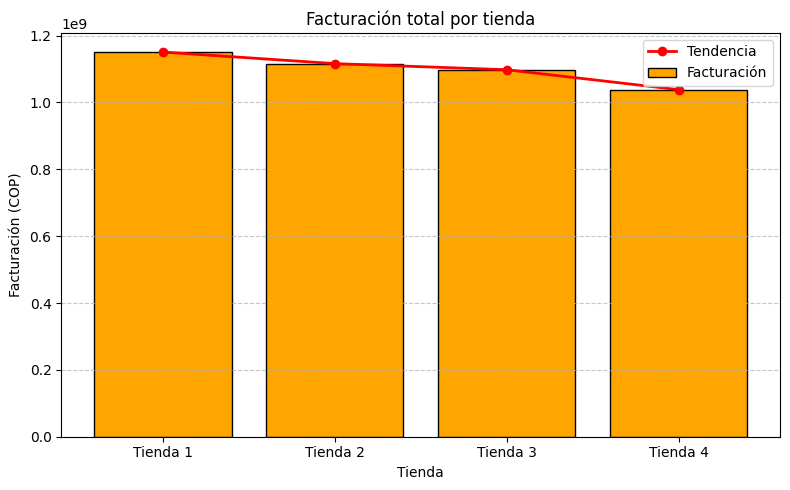

In [38]:
tiendas = [tienda, tienda2, tienda3, tienda4]
facturacion_total = []

for t in tiendas:
    total = t['Precio'].sum()
    facturacion_total.append(total)

# Etiquetas de tiendas
etiquetas_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x = range(len(etiquetas_tiendas))  # posiciones en el eje X

plt.figure(figsize=(8, 5))
plt.bar(x, facturacion_total, color='orange', edgecolor='black', label='Facturación')
plt.plot(x, facturacion_total, color='red', marker='o', linewidth=2, label='Tendencia')

# Etiquetas
plt.xticks(x, etiquetas_tiendas)
plt.title('Facturación total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación (COP)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Facturacion total de tienda por año

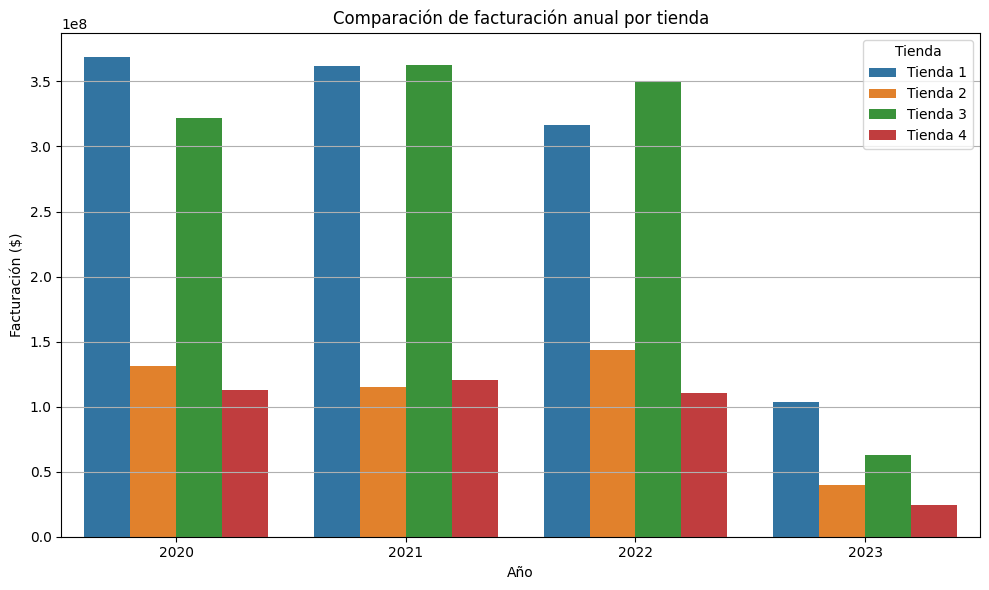

In [68]:
datos = []

for i, t in enumerate(tiendas, start=1):
    facturacion_anual = t.groupby('Año')['Precio'].sum().reset_index()
    facturacion_anual['Tienda'] = f'Tienda {i}'
    datos.append(facturacion_anual)

# Concatenar todo en un solo DataFrame
df_todas = pd.concat(datos)

#graficar

plt.figure(figsize=(10, 6))
sns.barplot(data=df_todas, x='Año', y='Precio', hue='Tienda')

plt.title('Comparación de facturación anual por tienda')
plt.xlabel('Año')
plt.ylabel('Facturación ($)')
plt.grid(axis='y')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

Grafico 3. Calificacion promedio por tienda

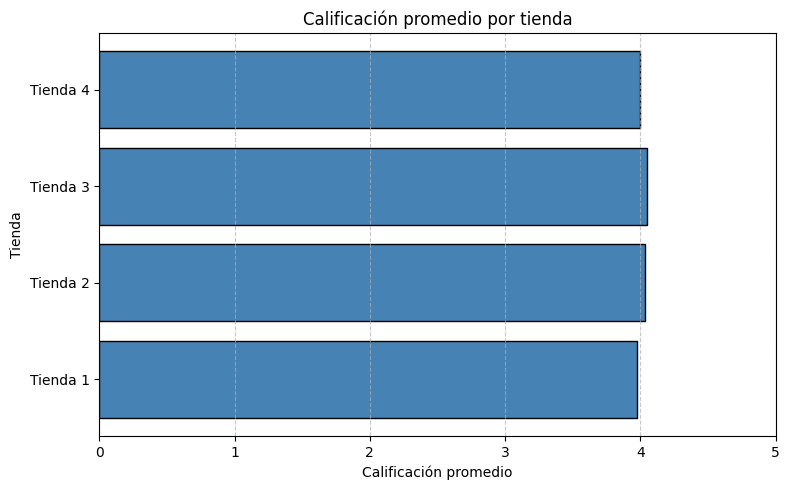

In [35]:
tiendas = [tienda, tienda2, tienda3, tienda4]
promedios_calificacion = []

for i, p in enumerate(tiendas, start=1):
    promedio = p['Calificación'].mean()
    promedios_calificacion.append(promedio)

# Crear gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedios_calificacion, color='steelblue', edgecolor='black')

plt.title('Calificación promedio por tienda')
plt.xlabel('Calificación promedio')
plt.ylabel('Tienda')
plt.xlim(0, 5)  # Rango típico de calificación
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. INFORME FINAL

##Introducción

El propósito de este análisis es identificar cuál de las cuatro tiendas debería ser vendida, basándonos en indicadores clave de desempeño. Para ello, se evaluaron los ingresos totales, los ingresos por año y la calificación promedio otorgada por los clientes. Esta evaluación busca proporcionar una recomendación clara y justificada, respaldada por datos y visualizaciones generadas durante el estudio.

##Desarrollo:

Para tomar una decisión informada, se consideraron los siguientes factores:

- Facturación total: La tienda 4 presenta el menor ingreso acumulado en comparación con las otras tres tiendas.

- Facturación anual: A lo largo de los años 2020, 2021, 2022 y 2023, la tienda 4 nunca logró destacar en términos de ventas. Incluso en 2023, cuando las ventas cayeron en general, las tiendas 1 y 3 mantuvieron niveles de ingreso aceptables, mientras que la tienda 2 mostró estabilidad.

- Calificación promedio: Las valoraciones de los clientes también reflejan un desempeño inferior en la tienda 4, la cual, junto con la tienda 1, tiene una calificación promedio de 3 estrellas. Este es un aspecto relevante, ya que indica una menor satisfacción del cliente. No obstante, la tienda 1 compensa este resultado con buenos niveles de ingreso.

Las visualizaciones generadas muestran claramente la diferencia en facturación y percepción del cliente entre las tiendas, permitiendo identificar fortalezas y debilidades de cada una.

##Conclusión y Recomendación:

Con base en los datos analizados, se concluye que la tienda 4 es la que presenta el desempeño más bajo, tanto en ventas como en calificación de los clientes. Su rendimiento ha sido constantemente inferior en todos los años evaluados, sin signos de mejora sostenida. Por tanto, se recomienda vender la tienda 4, ya que es la menos competitiva dentro del grupo.
